In [1]:

import os
import time
import json
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

import joblib
import pickle

from flask import Flask, request, jsonify, render_template


In [ ]:

data_path = "heart_disease_dataset_CHUD_S_A.csv"  
df = pd.read_csv(data_path)

<h1>Length of total samples</h1>

In [3]:

total_samples = df.shape[0]
print(f"Total number of samples in the dataset: {total_samples}")


Total number of samples in the dataset: 5000


<h1>Displaying length of total features</h1>

In [4]:

total_features = df.shape[1]
print(f"Total number of features (columns) in the dataset: {total_features}")


Total number of features (columns) in the dataset: 14


In [ ]:

print("First 5 rows of dataset:")
display(df.head())

First 5 rows of dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,38.871687,Male,Typical Angina,100.490248,163.166661,NaN,LV hypertrophy,183.658119,No,0.114644,Upsloping,0.0,Normal,no disease
1,60.625755,Male,Asymptomatic,NaN,338.711395,True,LV hypertrophy,141.161921,NaN,2.361526,Downsloping,2.0,NaN,severe
2,64.306898,Male,NaN,146.355656,337.004035,True,LV hypertrophy,NaN,Yes,2.660477,Downsloping,2.0,Reversible defect,severe
3,57.457313,Female,Non-Anginal Pain,NaN,260.116075,True,NaN,150.353969,Yes,1.145959,Flat,1.0,Reversible defect,mild
4,53.394739,Male,Non-Anginal Pain,129.763455,224.948879,False,LV hypertrophy,147.834030,Yes,NaN,Flat,NaN,Reversible defect,mild


<h1>Total sum of missing values for all features</h1>

In [6]:
print("Total missing values in the dataset:", df.isnull().sum().sum())


Total missing values in the dataset: 7660


<h1>shape of onl Instances</h>

In [7]:

print("Number of instances (samples):", df.shape[0])


Number of instances (samples): 5000


<h1>Shape for only features</h1>

In [8]:

print("Number of features (columns):", df.shape[1])


Number of features (columns): 14


<h1>Datatype of only features</h1>

In [9]:

print(df.dtypes)


age              float64
sex               object
cp                object
trestbps         float64
chol             float64
fbs               object
restecg           object
thalach          float64
exang             object
oldpeak          float64
slope             object
ca               float64
thal              object
heart_disease     object
dtype: object


<h1>Dataset detailed info</h1>

In [ ]:

print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex            4418 non-null   object 
 2   cp             4409 non-null   object 
 3   trestbps       4399 non-null   float64
 4   chol           4425 non-null   float64
 5   fbs            4421 non-null   object 
 6   restecg        4417 non-null   object 
 7   thalach        4416 non-null   float64
 8   exang          4405 non-null   object 
 9   oldpeak        4407 non-null   float64
 10  slope          4402 non-null   object 
 11  ca             4411 non-null   float64
 12  thal           4399 non-null   object 
 13  heart_disease  5000 non-null   object 
dtypes: float64(6), object(8)
memory usage: 547.0+ KB


In [ ]:

print("\nStatistics summary")
display(df.describe())


Statistics summary


,age,trestbps,chol,thalach,oldpeak,ca
count,4411.000000,4399.000000,4425.000000,4416.000000,4407.000000,4411.000000
mean,54.829901,133.019682,262.883223,150.289463,1.778127,1.378372
std,10.855032,19.913154,80.613567,22.141853,1.581597,1.022590
min,29.000000,94.000000,126.000000,101.383435,0.000000,0.000000
25%,46.027138,116.479869,188.967414,131.642083,0.485799,1.000000
50%,54.822873,134.500404,259.801646,149.953070,1.191017,1.000000
75%,63.539473,148.299363,327.875962,169.124221,2.626216,2.000000
max,77.000000,176.782096,423.482009,195.551682,5.165494,3.000000


In [ ]:

num_instances = df.shape[0]  
print(f"Number of instances  in the dataset: {num_instances}")

Number of instances  in the dataset: 5000


<h1>Samples for heart disease classes</h1>

In [13]:

class_counts = df['heart_disease'].value_counts().sort_index()
print(class_counts)


heart_disease
immediate danger     994
mild                1028
no disease          1030
severe               974
very mild            974
Name: count, dtype: int64


<h1>Heart disease class percentage</h1>

In [ ]:

class_percentage = (df['heart_disease'].value_counts(normalize=True) * 100).round(2).sort_index()


class_distribution = pd.DataFrame({
    'Count': df['heart_disease'].value_counts().sort_index(),
    'Percentage (%)': class_percentage
})

print(class_distribution)


                  Count  Percentage (%)
heart_disease                          
immediate danger    994           19.88
mild               1028           20.56
no disease         1030           20.60
severe              974           19.48
very mild           974           19.48


<h1>Checking if the class is balanced or imbalanced</h1>

In [ ]:

class_counts = df['heart_disease'].value_counts()


largest_class_count = class_counts.max()
smallest_class_count = class_counts.min()

print(f"Largest class count: {largest_class_count}")
print(f"Smallest class count: {smallest_class_count}")


imbalance_ratio = largest_class_count / smallest_class_count
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio == 1:
    print("The dataset is perfectly balanced.")
elif imbalance_ratio <= 1.5:
    print("The dataset is slightly imbalanced.")
elif imbalance_ratio <= 3:
    print("The dataset is moderately imbalanced.")
else:
    print("The dataset is highly imbalanced.")




Largest class count: 1030
Smallest class count: 974
Imbalance ratio: 1.06
The dataset is slightly imbalanced.


<h1>Classes distributions a bar plot</h1>

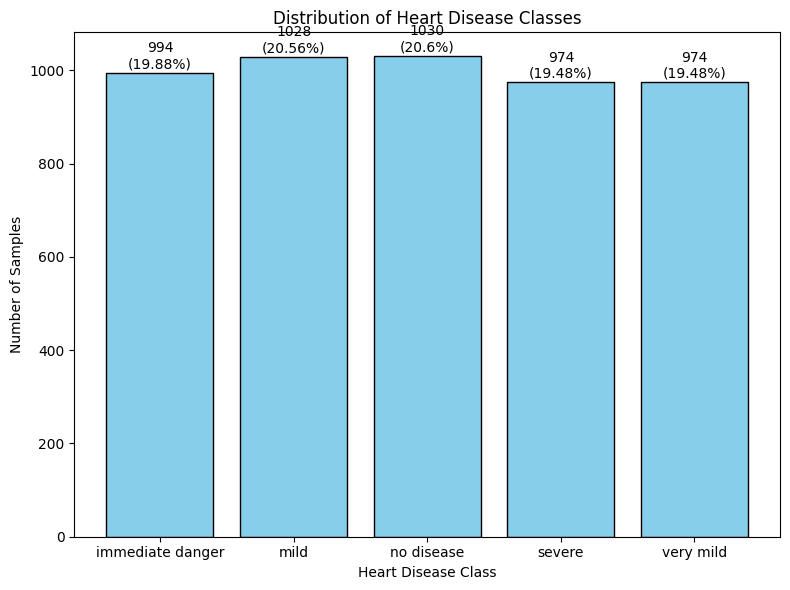

In [ ]:

class_counts = df['heart_disease'].value_counts().sort_index()
class_percent = (class_counts / class_counts.sum() * 100).round(2)

plt.figure(figsize=(8,6))
bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

for bar, count, perc in zip(bars, class_counts.values, class_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f"{count}\n({perc}%)", ha='center', fontsize=10)

plt.xlabel("Heart Disease Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Heart Disease Classes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<h1>Correlation Matrix</h1>

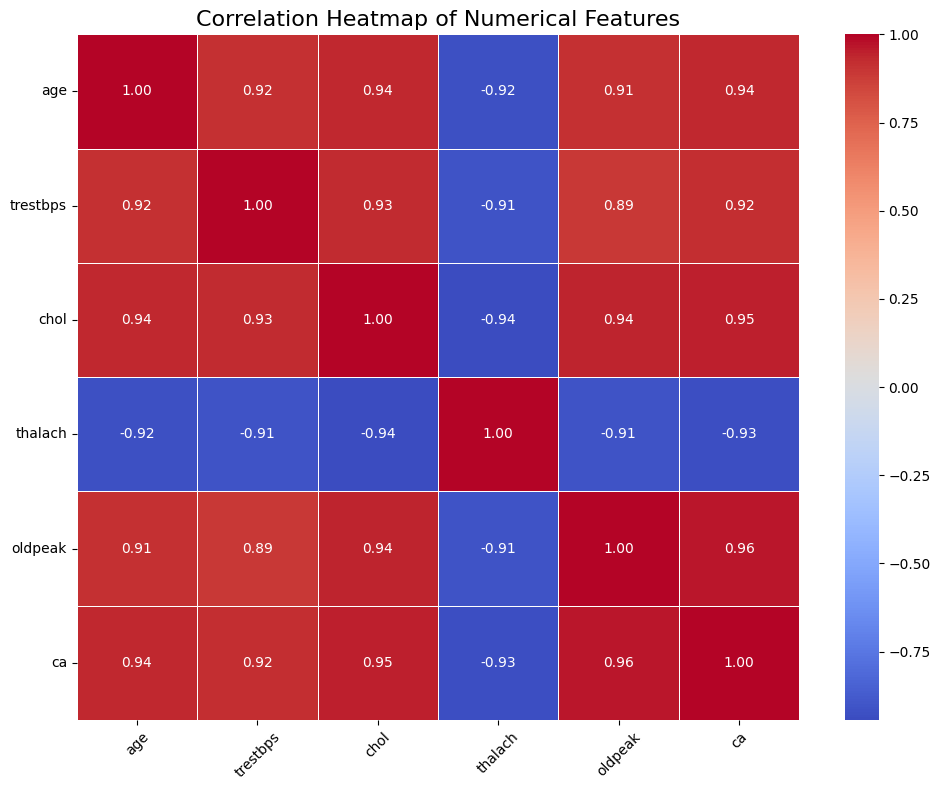

In [ ]:

num_features = df.select_dtypes(include=[np.number])

corr_matrix = num_features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<h1>Box plot showing patient age varies among 5 classes</h1>

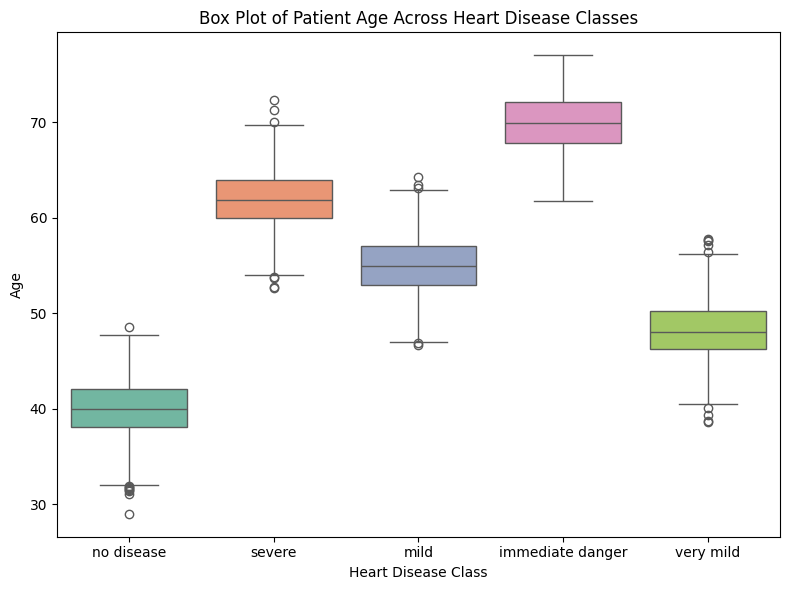

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='heart_disease', y='age', data=df, palette="Set2")

plt.xlabel("Heart Disease Class")
plt.ylabel("Age")
plt.title("Box Plot of Patient Age Across Heart Disease Classes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<>Box plot show cholesterol level across all classes<>

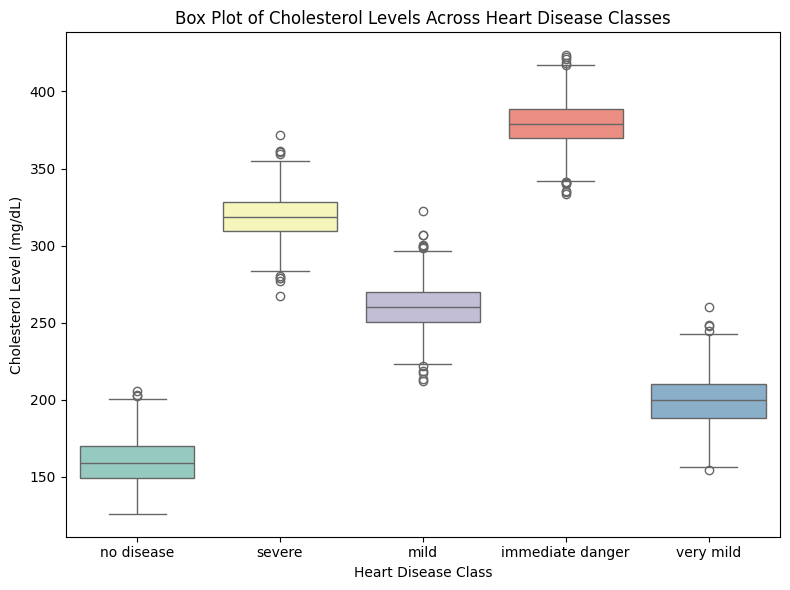

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='heart_disease', y='chol', data=df, palette="Set3")

plt.xlabel("Heart Disease Class")
plt.ylabel("Cholesterol Level (mg/dL)")
plt.title("Box Plot of Cholesterol Levels Across Heart Disease Classes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


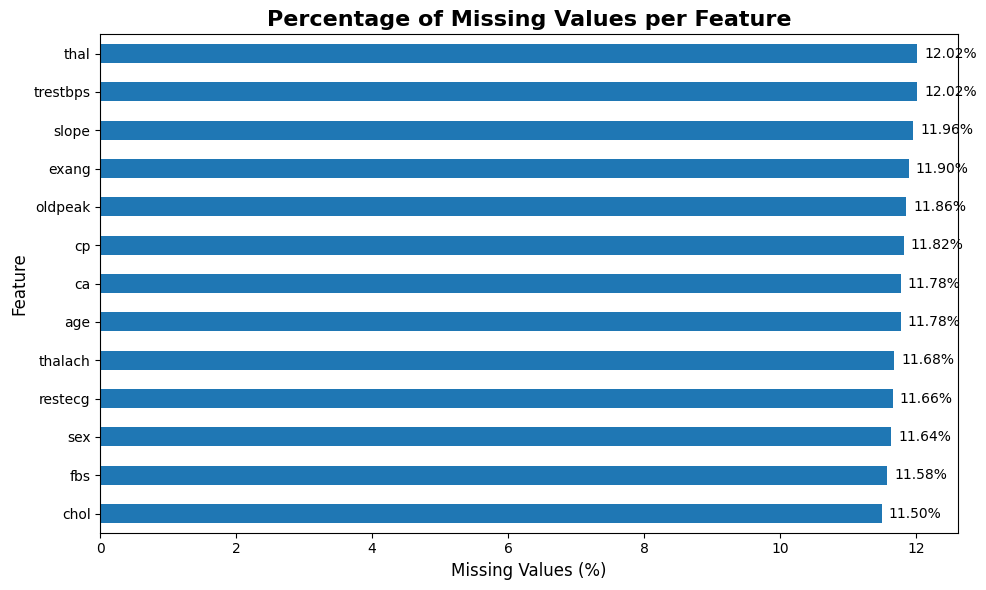

In [ ]:

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_percent = missing_percent[missing_percent > 0].sort_values()

if missing_percent.empty:
    print(" No missing values were found in the dataset.")
else:
    plt.figure(figsize=(10,6))
    missing_percent.plot(kind='barh')

    plt.title(
        'Percentage of Missing Values per Feature',
        fontsize=16,
        fontweight='bold'
    )
    plt.xlabel('Missing Values (%)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)

    for index, value in enumerate(missing_percent):
        plt.text(value + 0.1, index, f"{value:.2f}%", va='center')

    plt.tight_layout()
    plt.show()


In [ ]:


X = df.drop(columns=['heart_disease'])
y = df['heart_disease']


target_mapping = {
    'no disease': 0,
    'very mild': 1,
    'mild': 2,
    'severe': 3,
    'immediate danger': 4
}
y = y.map(target_mapping)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


In [ ]:

total_samples = len(df)

split_info = pd.DataFrame({
    'Dataset': ['Training set', 'Testing set'],
    'Samples': [len(X_train), len(X_test)],
    'Percentage (%)': [
        round(len(X_train) / total_samples * 100, 2),
        round(len(X_test) / total_samples * 100, 2)
    ]
})

print(split_info)


        Dataset  Samples  Percentage (%)
0  Training set     4000            80.0
1   Testing set     1000            20.0


In [ ]:

def class_percentage(series):
    return (series.value_counts(normalize=True) * 100).sort_index()


original_dist = class_percentage(y)
train_dist = class_percentage(y_train)
test_dist = class_percentage(y_test)

stratification_check = pd.DataFrame({
    'Original (%)': original_dist.round(2),
    'Train (%)': train_dist.round(2),
    'Test (%)': test_dist.round(2)
})

stratification_check.index = stratification_check.index.map({
    0: 'No Disease',
    1: 'Very Mild',
    2: 'Mild',
    3: 'Severe',
    4: 'Immediate Danger'
})

print("Stratification Verification Table:")
stratification_check


Stratification Verification Table:


,Original (%),Train (%),Test (%)
heart_disease,,,
No Disease,20.60,20.60,20.6
Very Mild,19.48,19.48,19.5
Mild,20.56,20.58,20.5
Severe,19.48,19.48,19.5
Immediate Danger,19.88,19.88,19.9


In [ ]:

num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'heart_disease' in num_features:
    num_features.remove('heart_disease')

print("Numerical features:")
print(num_features)


Numerical features:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


In [ ]:

print(f"\nNumber of numerical features: {len(num_features)}")



Number of numerical features: 6


In [ ]:

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

print("Numerical preprocessing pipeline created successfully.")


Numerical preprocessing pipeline created successfully.


In [ ]:

cat_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

if 'heart_disease' in cat_features:
    cat_features.remove('heart_disease')

print("Categorical features:")
print(cat_features)


Categorical features:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:

print(f"\nNumber of categorical features: {len(cat_features)}")



Number of categorical features: 7


In [ ]:


cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

print("Categorical preprocessing pipeline created successfully.")


Categorical preprocessing pipeline created successfully.


In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ]
)

print("Combined preprocessing pipeline created.")


Combined preprocessing pipeline created.


In [ ]:

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [ ]:

print("Transformed data shapes:")
print(f"Training set shape: {X_train_processed.shape}")
print(f"Testing set shape:  {X_test_processed.shape}")


Transformed data shapes:
Training set shape: (4000, 18)
Testing set shape:  (1000, 18)


In [ ]:


train_missing = np.isnan(X_train_processed).sum()

print(f"Missing values in transformed training data: {train_missing}")


Missing values in transformed training data: 0


In [ ]:

test_missing = np.isnan(X_test_processed).sum()

print(f"Missing values in transformed testing data: {test_missing}")


Missing values in transformed testing data: 0


In [ ]:

print("Training data type:", X_train_processed.dtype)
print("Testing data type:", X_test_processed.dtype)


Training data type: float64
Testing data type: float64


In [ ]:

pipelines = {
    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            random_state=42,
            class_weight='balanced'
        ))
    ]),

    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(
            probability=True,
            class_weight='balanced',
            random_state=42
        ))
    ]),

    'KNN': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),

    'Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(
            random_state=42
        ))
    ]),

    'MLP (ANN)': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', MLPClassifier(
            max_iter=500,
            random_state=42
        ))
    ])
}


<h1>Gridsearch to tune all 5 models</h1>

In [ ]:

rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}


svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear'],
    'classifier__gamma': ['scale', 'auto']
}


knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}


mlp_param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'classifier__alpha': [0.0001, 0.001],
    'classifier__learning_rate_init': [0.001, 0.01]
}


<H1>GridSearchCV Objects<H1>

In [39]:
param_grids = {
    'Random Forest': rf_param_grid,
    'SVM': svm_param_grid,
    'KNN': knn_param_grid,
    'Gradient Boosting': gb_param_grid,
    'MLP (ANN)': mlp_param_grid
}

grid_searches = {}

for model_name, pipeline in pipelines.items():
    print(f"\nRunning GridSearchCV for {model_name}...")
    
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    grid_searches[model_name] = grid
    
    print(f"Best CV Accuracy for {model_name}: {grid.best_score_:.4f}")
    print(f"Best Parameters: {grid.best_params_}")



Running GridSearchCV for Random Forest...
Best CV Accuracy for Random Forest: 0.9995
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Running GridSearchCV for SVM...
Best CV Accuracy for SVM: 0.9985
Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Running GridSearchCV for KNN...
Best CV Accuracy for KNN: 0.9960
Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}

Running GridSearchCV for Gradient Boosting...
Best CV Accuracy for Gradient Boosting: 0.9992
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}

Running GridSearchCV for MLP (ANN)...
Best CV Accuracy for MLP (ANN): 0.9977
Best Parameters: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100, 50), 'classifier__learning_rate_init': 0.01}


<h1>Dataframe to store results<h1>

In [ ]:



results_list = []

for model_name, grid in grid_searches.items():
    start_time = time.time()
    
    
    grid.best_estimator_.fit(X_train, y_train)
    
    end_time = time.time()
    training_time = round(end_time - start_time, 2)
    
   
    results_list.append({
        'Model': model_name,
        'Best Parameters': grid.best_params_,
        'Best CV Accuracy': round(grid.best_score_, 4),
        'Training Time (s)': training_time
    })


model_results = pd.DataFrame(results_list)


model_results



,Model,Best Parameters,Best CV Accuracy,Training Time (s)
0,Random Forest,"{'classifier__max_depth': None, 'classifier__m...",0.9995,1.01
1,SVM,"{'classifier__C': 10, 'classifier__gamma': 'sc...",0.9985,0.38
2,KNN,"{'classifier__metric': 'manhattan', 'classifie...",0.9960,0.04
3,Gradient Boosting,"{'classifier__learning_rate': 0.1, 'classifier...",0.9992,13.90
4,MLP (ANN),"{'classifier__alpha': 0.001, 'classifier__hidd...",0.9978,2.33


<h1>Store model performance results</h1>

In [41]:
performance_results = pd.DataFrame(columns=[
    'Model', 'Best Parameters', 'CV Accuracy', 'Training Accuracy', 'Test Accuracy', 'Training Time (s)'
])


<h1>Evaluate each model and store metrics</h1>

In [ ]:


performance_list = []

for model_name, grid in grid_searches.items():
    print(f"Evaluating {model_name}...")
    
    start_time = time.time()
    
   
    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)
    
    end_time = time.time()
    training_time = round(end_time - start_time, 2)
    

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    
    train_acc = round(accuracy_score(y_train, y_train_pred), 4)
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    cv_acc = round(grid.best_score_, 4)
    
   
    performance_list.append({
        'Model': model_name,
        'Best Parameters': grid.best_params_,
        'CV Accuracy': cv_acc,
        'Training Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Training Time (s)': training_time
    })


performance_results = pd.DataFrame(performance_list)

performance_results


Evaluating Random Forest...
Evaluating SVM...
Evaluating KNN...
Evaluating Gradient Boosting...
Evaluating MLP (ANN)...


,Model,Best Parameters,CV Accuracy,Training Accuracy,Test Accuracy,Training Time (s)
0,Random Forest,"{'classifier__max_depth': None, 'classifier__m...",0.9995,1.0000,1.000,0.80
1,SVM,"{'classifier__C': 10, 'classifier__gamma': 'sc...",0.9985,1.0000,0.998,0.37
2,KNN,"{'classifier__metric': 'manhattan', 'classifie...",0.9960,0.9975,0.997,0.04
3,Gradient Boosting,"{'classifier__learning_rate': 0.1, 'classifier...",0.9992,1.0000,0.999,21.03
4,MLP (ANN),"{'classifier__alpha': 0.001, 'classifier__hidd...",0.9978,1.0000,0.998,3.15


<h1>Model performance</h1>

In [ ]:

comparison_df = performance_results.copy()


comparison_df['Overfitting Gap'] = (comparison_df['Training Accuracy'] - comparison_df['Test Accuracy']).round(4)


comparison_df = comparison_df[['Model', 'CV Accuracy', 'Training Accuracy', 'Test Accuracy', 'Overfitting Gap']]


comparison_df


,Model,CV Accuracy,Training Accuracy,Test Accuracy,Overfitting Gap
0,Random Forest,0.9995,1.0000,1.000,0.0000
1,SVM,0.9985,1.0000,0.998,0.0020
2,KNN,0.9960,0.9975,0.997,0.0005
3,Gradient Boosting,0.9992,1.0000,0.999,0.0010
4,MLP (ANN),0.9978,1.0000,0.998,0.0020


<h1> Rule to classify model as best,underfit or overfit</h1>

In [ ]:

def classify_model(row):
    gap = row['Overfitting Gap']
    test_acc = row['Test Accuracy']
    
    if gap > 0.03:
        return 'Overfit'
    elif gap < 0.01 and test_acc < 0.80:
        return 'Underfit'
    else:
        return 'Best Fit'


comparison_df['Fit Category'] = comparison_df.apply(classify_model, axis=1)


comparison_df


,Model,CV Accuracy,Training Accuracy,Test Accuracy,Overfitting Gap,Fit Category
0,Random Forest,0.9995,1.0000,1.000,0.0000,Best Fit
1,SVM,0.9985,1.0000,0.998,0.0020,Best Fit
2,KNN,0.9960,0.9975,0.997,0.0005,Best Fit
3,Gradient Boosting,0.9992,1.0000,0.999,0.0010,Best Fit
4,MLP (ANN),0.9978,1.0000,0.998,0.0020,Best Fit


<h1> Sort comparison table</h1>

In [ ]:

comparison_df_full = performance_results.copy()


comparison_df_full['Overfitting Gap'] = (comparison_df_full['Training Accuracy'] - comparison_df_full['Test Accuracy']).round(4)


def classify_model(row):
    gap = row['Overfitting Gap']
    test_acc = row['Test Accuracy']
    
    if gap > 0.03:
        return 'Overfit'
    elif gap < 0.01 and test_acc < 0.80:
        return 'Underfit'
    else:
        return 'Best Fit'

comparison_df_full['Status'] = comparison_df_full.apply(classify_model, axis=1)


comparison_df_full = comparison_df_full[['Model', 'CV Accuracy', 'Training Accuracy', 'Test Accuracy', 'Overfitting Gap', 'Status']]
comparison_df_full.columns = ['Model', 'Best CV Accuracy', 'Train Accuracy', 'Test Accuracy', 'Overfitting Gap', 'Status']


In [ ]:

comparison_df_sorted = comparison_df_full.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)


comparison_df_sorted


,Model,Best CV Accuracy,Train Accuracy,Test Accuracy,Overfitting Gap,Status
0,Random Forest,0.9995,1.0000,1.000,0.0000,Best Fit
1,Gradient Boosting,0.9992,1.0000,0.999,0.0010,Best Fit
2,SVM,0.9985,1.0000,0.998,0.0020,Best Fit
3,MLP (ANN),0.9978,1.0000,0.998,0.0020,Best Fit
4,KNN,0.9960,0.9975,0.997,0.0005,Best Fit


<h1>Select the best model</h1>

In [ ]:

best_model_row = comparison_df_sorted.iloc[0]

best_model_name = best_model_row['Model']
best_model_test_accuracy = best_model_row['Test Accuracy']

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_model_test_accuracy:.4f}")


Best Model: Random Forest
Test Accuracy: 1.0000


<h1>Classification report on the best model</h1>

In [ ]:

best_model_pipeline = grid_searches[best_model_name].best_estimator_

y_test_pred = best_model_pipeline.predict(X_test)


In [ ]:

target_inverse_mapping = {
    0: 'no disease',
    1: 'very mild',
    2: 'mild',
    3: 'severe',
    4: 'immediate danger'
}

y_test_labels = y_test.map(target_inverse_mapping)
y_pred_labels = pd.Series(y_test_pred).map(target_inverse_mapping)


In [50]:
report = classification_report(
    y_test_labels,
    y_pred_labels,
    target_names=list(target_inverse_mapping.values())
)

print(f"Classification Report for {best_model_name}:\n")
print(report)


Classification Report for Random Forest:

                  precision    recall  f1-score   support

      no disease       1.00      1.00      1.00       199
       very mild       1.00      1.00      1.00       205
            mild       1.00      1.00      1.00       206
          severe       1.00      1.00      1.00       195
immediate danger       1.00      1.00      1.00       195

        accuracy                           1.00      1000
       macro avg       1.00      1.00      1.00      1000
    weighted avg       1.00      1.00      1.00      1000



<h1>Confusion matrix</h1>

In [ ]:

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=list(target_inverse_mapping.values()))


<h1>Visualization</h1>

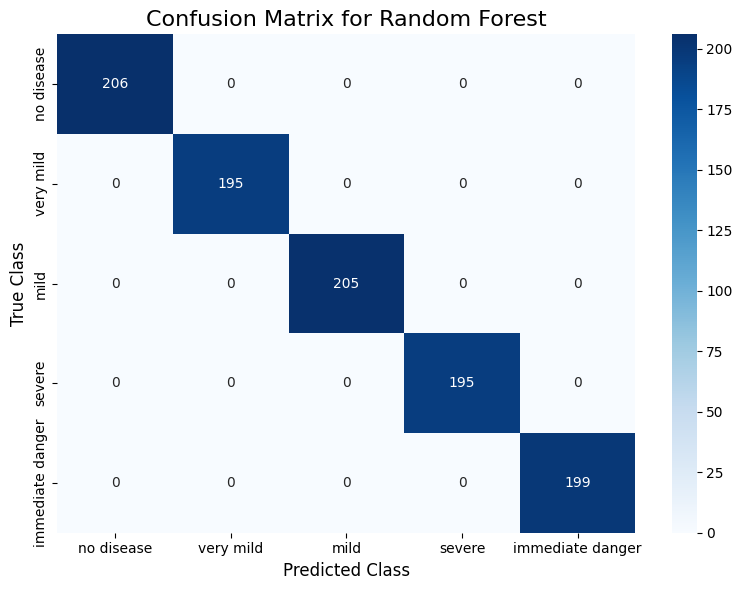

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(target_inverse_mapping.values()),
            yticklabels=list(target_inverse_mapping.values()))
plt.title(f'Confusion Matrix for {best_model_name}', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.tight_layout()


plt.savefig(f'confusion_matrix_{best_model_name.replace(" ", "_")}.png', dpi=300)

plt.show()


<h1>Classification report to dataframe</h1>

In [ ]:


report_dict = classification_report(
    y_test_labels,
    y_pred_labels,
    target_names=list(target_inverse_mapping.values()),
    output_dict=True
)


report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.iloc[:-3, :]  
report_df


,precision,recall,f1-score,support
no disease,1.0,1.0,1.0,199.0
very mild,1.0,1.0,1.0,205.0
mild,1.0,1.0,1.0,206.0
severe,1.0,1.0,1.0,195.0
immediate danger,1.0,1.0,1.0,195.0


In [ ]:

highest_precision_class = report_df['precision'].idxmax()
highest_precision_value = report_df['precision'].max()


lowest_recall_class = report_df['recall'].idxmin()
lowest_recall_value = report_df['recall'].min()

print(f"Class with highest precision: {highest_precision_class} ({highest_precision_value:.2f})")
print(f"Class with lowest recall: {lowest_recall_class} ({lowest_recall_value:.2f})")


Class with highest precision: no disease (1.00)
Class with lowest recall: no disease (1.00)


<h1>Check if model supports feature importance</h1>

In [ ]:

if hasattr(best_model_pipeline.named_steps['classifier'], 'feature_importances_'):
    print(f"{best_model_name} supports feature importance.")
else:
    print(f"{best_model_name} does NOT support feature importance.")


Random Forest supports feature importance.


In [ ]:

num_features_names = num_features  


cat_transformer = best_model_pipeline.named_steps['preprocessor'].named_transformers_['cat']

if isinstance(cat_transformer, Pipeline):
    ohe_step = [step for name, step in cat_transformer.steps if isinstance(step, OneHotEncoder)][0]
    cat_features_names = ohe_step.get_feature_names_out(cat_features)
else:

    cat_features_names = cat_transformer.get_feature_names_out(cat_features)

all_feature_names = list(num_features_names) + list(cat_features_names)

print(f"Total transformed feature count: {len(all_feature_names)}")
print(all_feature_names[:10], "...")  


Total transformed feature count: 18
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_Male', 'cp_Atypical Angina', 'cp_Non-Anginal Pain', 'cp_Typical Angina'] ...


In [ ]:
importances = best_model_pipeline.named_steps['classifier'].feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)


feature_importance_df.head(10)


,Feature,Importance
0,ca,0.164309
1,oldpeak,0.145243
2,cp_Non-Anginal Pain,0.113457
3,cp_Atypical Angina,0.086409
4,chol,0.085012
5,thal_Reversible defect,0.063966
6,cp_Typical Angina,0.057143
7,thal_Normal,0.055231
8,thalach,0.045393
9,slope_Flat,0.043875


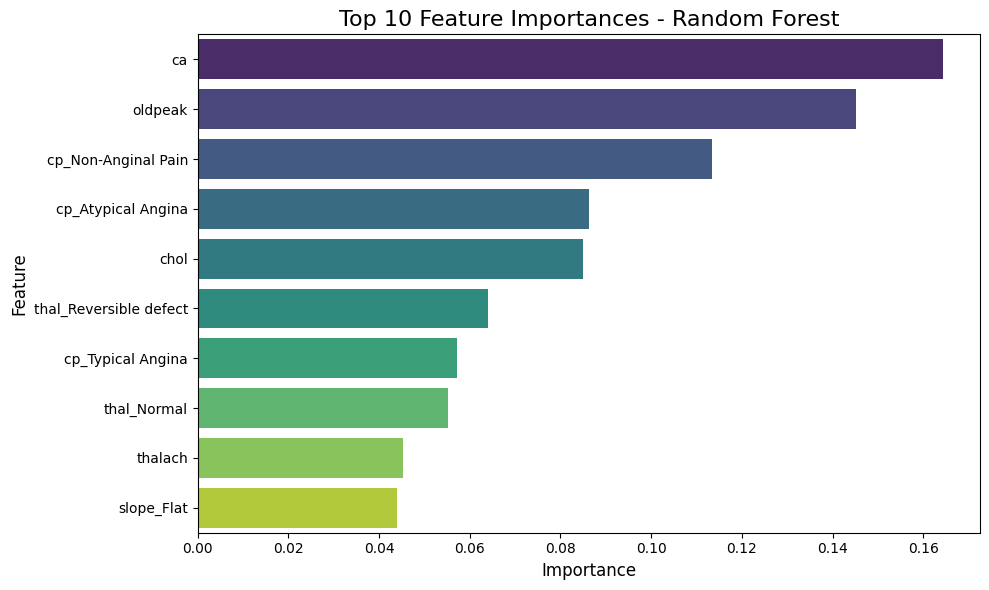

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title(f'Top 10 Feature Importances - {best_model_name}', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


<create directory></h1>

In [ ]:

deployment_dir = "deployment"
if not os.path.exists(deployment_dir):
    os.makedirs(deployment_dir)


<h1> Save the best model</h1>

In [ ]:


deployment_dir = "deployment"
os.makedirs(deployment_dir, exist_ok=True)  

model_filename = os.path.join(deployment_dir, "best_heart_disease_model.pkl")

joblib.dump(best_model_pipeline, model_filename, protocol=4)

print(f" Best model saved successfully at: {model_filename}")



 Best model saved successfully at: deployment\best_heart_disease_model.pkl


<h1>Save feature names</h1>

In [ ]:

num_features_names = list(num_features)


preprocessor = best_model_pipeline.named_steps['preprocessor']
cat_transformer = preprocessor.named_transformers_['cat']

if isinstance(cat_transformer, Pipeline):
    for step in cat_transformer.steps:
        if isinstance(step[1], OneHotEncoder):
            ohe = step[1]
            break
else:
    ohe = cat_transformer

cat_features_names = ohe.get_feature_names_out(cat_features)

all_feature_names = num_features_names + list(cat_features_names)

print("Total transformed feature count:", len(all_feature_names))
print(all_feature_names)


Total transformed feature count: 18
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_Male', 'cp_Atypical Angina', 'cp_Non-Anginal Pain', 'cp_Typical Angina', 'fbs_True', 'restecg_Normal', 'restecg_ST-T abnormality', 'exang_Yes', 'slope_Flat', 'slope_Upsloping', 'thal_Normal', 'thal_Reversible defect']


<h1>Save class name</h1>

In [ ]:

deployment_dir = "deployment"
os.makedirs(deployment_dir, exist_ok=True)
heart_disease_classes = ["No Disease", "Very Mild", "Mild", "Severe", "Immediate Danger"]

class_file = os.path.join(deployment_dir, "class_names.txt")
with open(class_file, "w") as f:
    for cls in heart_disease_classes:
        f.write(cls + "\n")

print(f"Heart disease class names saved successfully at: {class_file}")
print("Total classes:", len(heart_disease_classes))


Heart disease class names saved successfully at: deployment\class_names.txt
Total classes: 5


<h1>Load saved model</h1>

In [ ]:


saved_model_path = "deployment/best_heart_disease_model.pkl"
loaded_model = joblib.load(saved_model_path)
print(f" Loaded model from: {saved_model_path}")

target_inverse_mapping = {
    0: "No Disease",
    1: "Very Mild",
    2: "Mild",
    3: "Severe",
    4: "Immediate Danger"
}

sample_indices = X_test.sample(10, random_state=42).index
X_sample = X_test.loc[sample_indices]
y_sample_actual = y_test.loc[sample_indices]

y_sample_pred = loaded_model.predict(X_sample)

y_sample_actual_labels = y_sample_actual.map(target_inverse_mapping)
y_sample_pred_labels = pd.Series(y_sample_pred).map(target_inverse_mapping)

verification_df = pd.DataFrame({
    "Sample Index": sample_indices,
    "Actual Class": y_sample_actual_labels.values,
    "Predicted Class": y_sample_pred_labels.values
})

verification_df["Match"] = verification_df["Actual Class"] == verification_df["Predicted Class"]

verification_df.reset_index(drop=True, inplace=True)

verification_df


 Loaded model from: deployment/best_heart_disease_model.pkl


,Sample Index,Actual Class,Predicted Class,Match
0,3003,Immediate Danger,Immediate Danger,True
1,3635,Mild,Mild,True
2,1421,Immediate Danger,Immediate Danger,True
3,6,No Disease,No Disease,True
4,3074,Mild,Mild,True
5,4357,Very Mild,Very Mild,True
6,2945,No Disease,No Disease,True
7,3153,Severe,Severe,True
8,4412,Very Mild,Very Mild,True
9,4473,No Disease,No Disease,True


<h1>Patient examples</h1>

In [ ]:

new_patients = pd.DataFrame([
    {
        'age': 55,
        'sex': 'Male',
        'cp': 'Typical Angina',
        'trestbps': 140,
        'chol': 250,
        'fbs': False,
        'restecg': 'Normal',
        'thalach': 160,
        'exang': 'No',
        'oldpeak': 1.0,
        'slope': 'Upsloping',
        'ca': 0,
        'thal': 'Normal'
    },
    {
        'age': 63,
        'sex': 'Female',
        'cp': 'Asymptomatic',
        'trestbps': 150,
        'chol': 300,
        'fbs': True,
        'restecg': 'LV hypertrophy',
        'thalach': 140,
        'exang': 'Yes',
        'oldpeak': 2.5,
        'slope': 'Flat',
        'ca': 2,
        'thal': 'Reversible defect'
    },
    {
        'age': 48,
        'sex': 'Male',
        'cp': 'Non-Anginal Pain',
        'trestbps': 130,
        'chol': 210,
        'fbs': False,
        'restecg': 'Normal',
        'thalach': 175,
        'exang': 'No',
        'oldpeak': 0.5,
        'slope': 'Upsloping',
        'ca': 0,
        'thal': 'Normal'
    }
])

new_patients
pred_classes = loaded_model.predict(new_patients)

pred_probs = loaded_model.predict_proba(new_patients)
pred_probs_df = pd.DataFrame(pred_probs, columns=target_inverse_mapping.values())

results_df = new_patients.copy()
results_df['Predicted Class'] = pd.Series(pred_classes).map(target_inverse_mapping)
results_df = pd.concat([results_df, pred_probs_df], axis=1)

results_df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predicted Class,No Disease,Very Mild,Mild,Severe,Immediate Danger
0,55,Male,Typical Angina,140,250,False,Normal,160,No,1.0,Upsloping,0,Normal,No Disease,1.00,0.00,0.0,0.0,0.0
1,63,Female,Asymptomatic,150,300,True,LV hypertrophy,140,Yes,2.5,Flat,2,Reversible defect,Severe,0.00,0.00,0.0,1.0,0.0
2,48,Male,Non-Anginal Pain,130,210,False,Normal,175,No,0.5,Upsloping,0,Normal,No Disease,0.69,0.01,0.3,0.0,0.0
